In [118]:
import numpy as np
from matplotlib import pyplot as plt

def load(name):
    return np.load("./model/" + name + ".npy")

history = load("history")
trainable = load("trainable")
wState = load("stateWeights")
wInput = load("inputWeights")
bias = load("bias")
yhats = load("predictions")
ys = load("labels")
inputs = load("inputs")

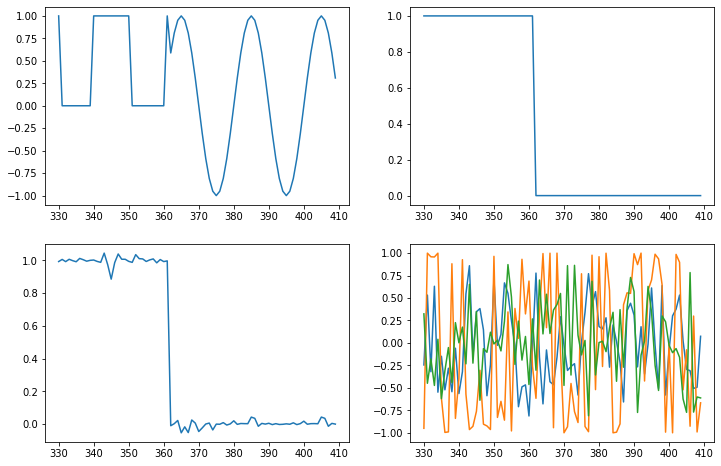

In [119]:
figs, ax = plt.subplots(2, 2, figsize=(12, 8))

s = 330
e = s + 80
size = e - s

indicies = [32, 50, 12]
interest = history[s:e]
interest = np.resize(interest, (100, size))

xs = np.arange(s, e)
py = ys[s:e]
pi = inputs[s:e]
phats = yhats[s:e]


for i in indicies:
    ax[1, 1].plot(xs, interest[i])
    
ax[0, 1].plot(xs, py)
ax[1, 0].plot(xs, phats)
ax[0, 0].plot(xs, pi)


In [106]:
print("Mean abs size trainable")
print(np.sum(np.abs(trainable)) / trainable.size)
print("Max weight (abs)")
print(np.max(np.abs(trainable)))
print()

print("Mean abs size input")
print(np.sum(np.abs(wInput)) / wInput.size)
print()

print("Mean abs size state")
print(np.sum(np.abs(wState)) / wState.size)
print("Spectral radius of state")
eigens = np.resize(np.linalg.eigvals(wState), (10000, 1))
print(np.linalg.norm(np.max(eigens)))

Mean abs size trainable
4.18611147217359
Max weight (abs)
16.98218409255367

Mean abs size input
0.5950169153031386

Mean abs size state
0.07155584064362137
Spectral radius of state
0.7999999999999966


In [107]:
inputs.size

10000

In [171]:
l = np.array([2, 3, 123])
t = np.array([3, 5, 8])

np.sum(l * t) == t.dot(l)

True

In [258]:
h = np.array([
    [1, 2, 3],
    [1, 4, 3],
    [9, 2, 3],
    [1, 2, 7],
    [0, 9, 7]
])

t = np.array([1, 4, 8])

print(h * t)
np.dot(h, t)

[[ 1  8 24]
 [ 1 16 24]
 [ 9  8 24]
 [ 1  8 56]
 [ 0 36 56]]


array([33, 41, 41, 65, 92])

In [35]:
np.linalg.eigvals(wState)

array([-91.24482644 +0.j        , -18.43256953 +0.j        ,
        -0.32895191+18.95444863j,  -0.32895191-18.95444863j,
        10.38073607+15.48230592j,  10.38073607-15.48230592j,
        -4.04200371+17.54989533j,  -4.04200371-17.54989533j,
        16.20643574 +7.6506885j ,  16.20643574 -7.6506885j ,
       -10.44083712+13.21017883j, -10.44083712-13.21017883j,
       -16.8789336  +1.08917303j, -16.8789336  -1.08917303j,
        11.2875714 +12.07186556j,  11.2875714 -12.07186556j,
       -12.22948135+10.83152135j, -12.22948135-10.83152135j,
       -14.6468627  +6.31838681j, -14.6468627  -6.31838681j,
        15.29318015 +4.27324033j,  15.29318015 -4.27324033j,
        -5.04244553+14.6483101j ,  -5.04244553-14.6483101j ,
        14.75100994 +0.j        ,   9.79431124+11.53364299j,
         9.79431124-11.53364299j,  -1.64913463+15.01475796j,
        -1.64913463-15.01475796j, -11.24035334 +9.12230868j,
       -11.24035334 -9.12230868j,   0.57279031+14.46410054j,
         0.57279031-14.4

In [262]:
def estimate_time(scales, multi=False):
    runs = scales.size ** 2
    return (runs * 1.5 if multi else 15) / 3600

estimate_time(np.arange(0.01, 1, 0.015), multi=True)

1.815

In [249]:
import multiprocessing

multiprocessing.cpu_count()

8

In [252]:
np.arange(0.1, 0.8, 0.4).size

2

In [13]:
n = 50
epochs = 120
def get_square_size(x):
    b = n // 2
    a = (1 - b) / epochs
    return a * x + b

get_square_size(11)

22.8